In [ ]:
!pip install Keract

11490434/11490434 [==============================] - 0s 0us/step
Model: "full_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 784)               39984     
                                                                 
Total params: 79234 (309.51 KB)
Trainable params: 79234 (309.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0      

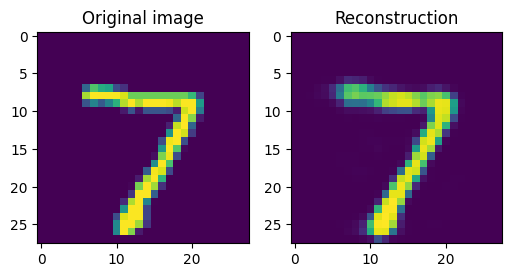

input_1 (1, 784) 


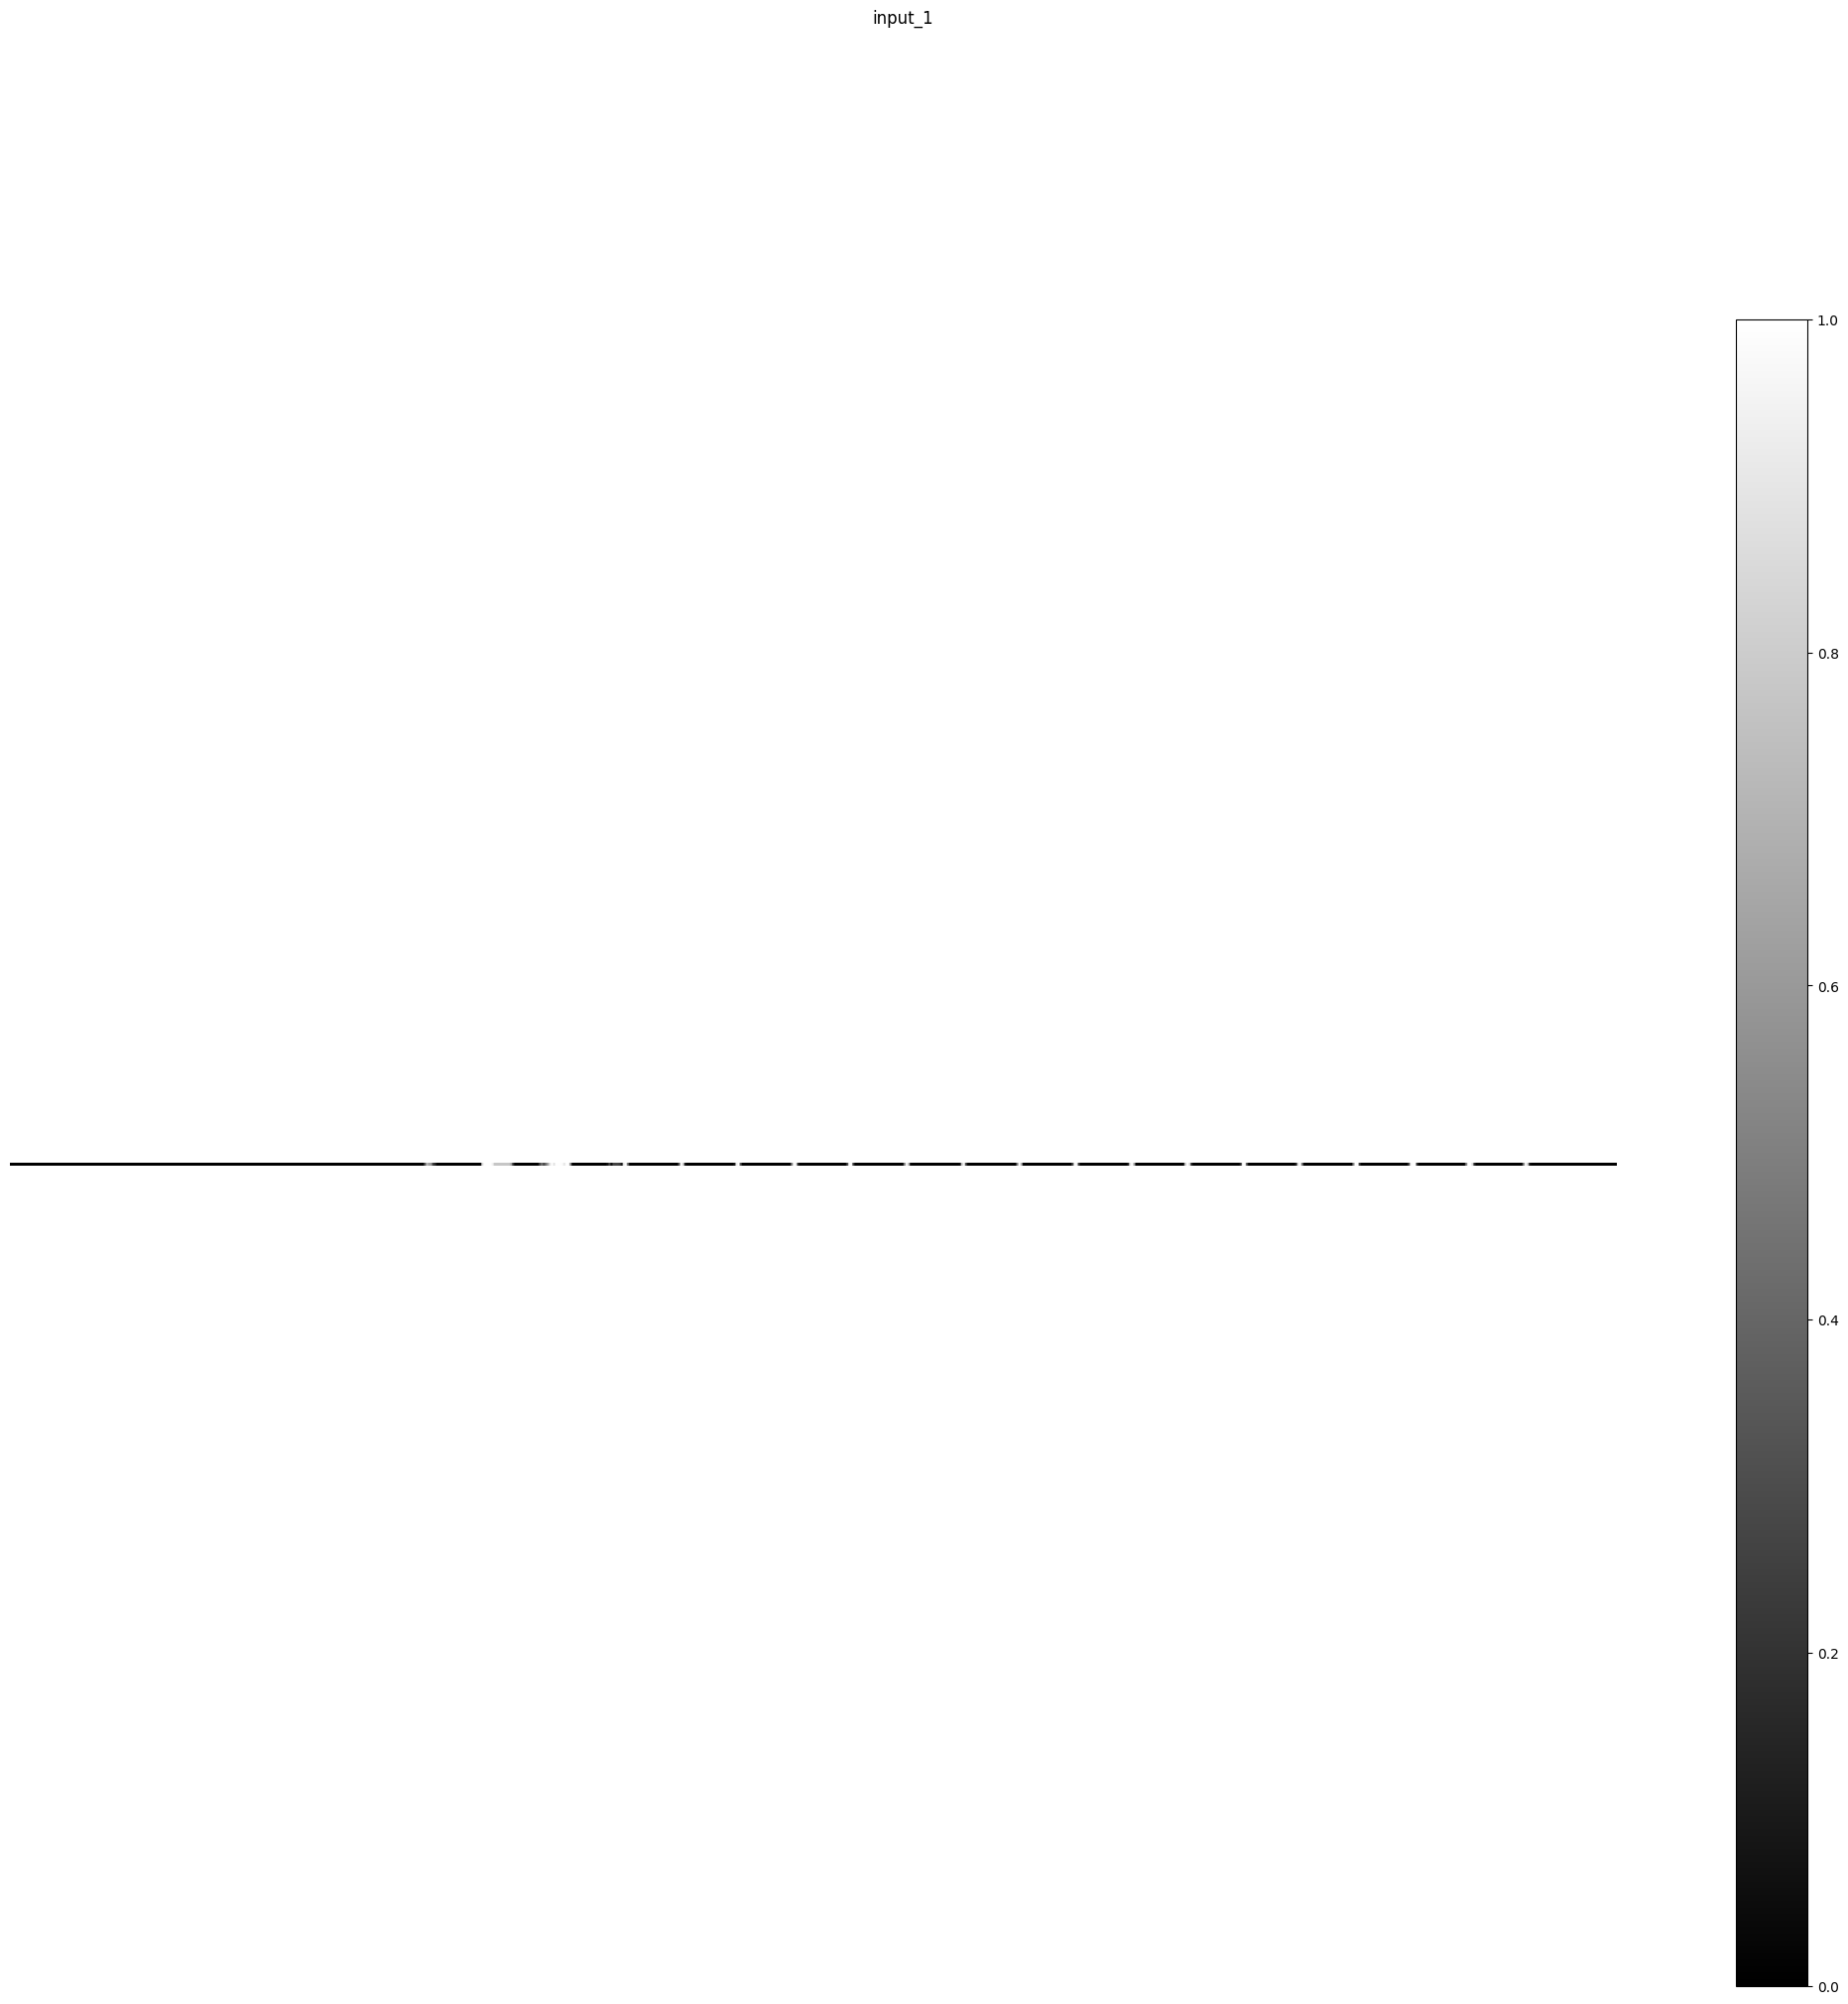

dense (1, 50) 


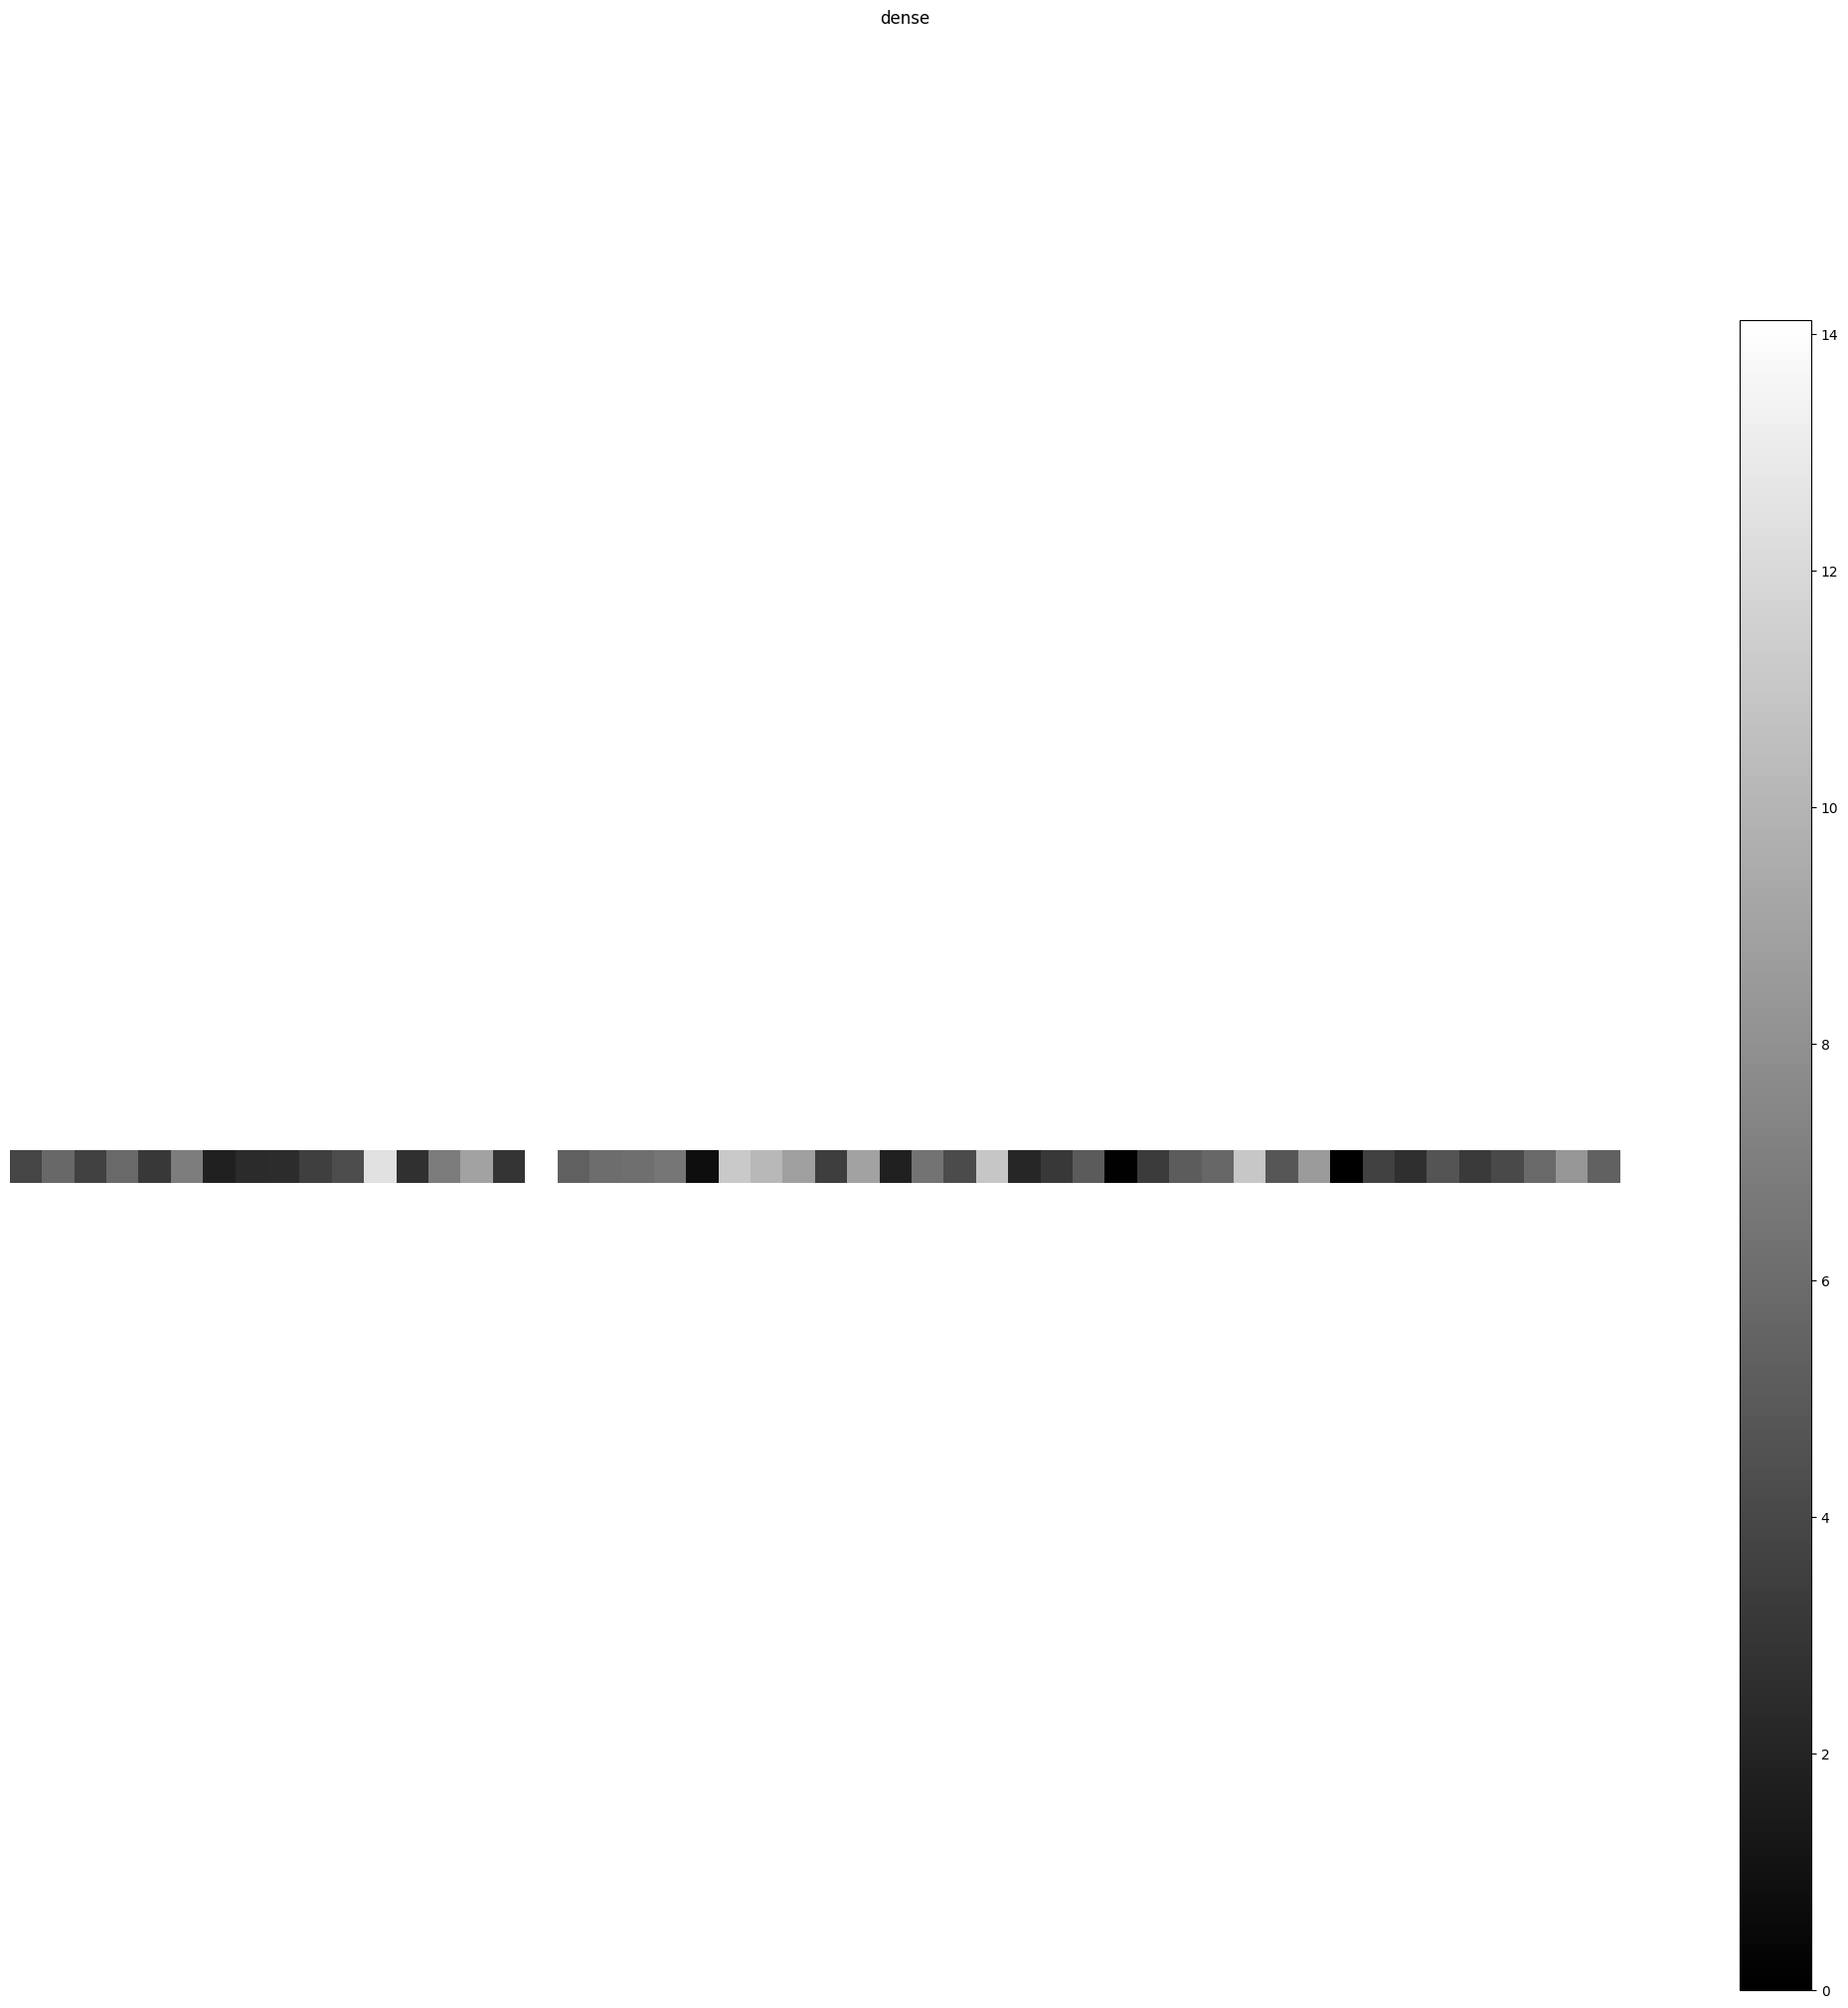

In [ ]:
import keras
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Model
from keract import get_activations, display_activations
import matplotlib.pyplot as plt

# Model configuration
img_width, img_height = 28, 28
initial_dimension = img_width * img_height
batch_size = 128
no_epochs = 10
validation_split = 0.2
verbosity = 1
encoded_dim = 50

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], initial_dimension)
input_test = input_test.reshape(input_test.shape[0], initial_dimension)
input_shape = (initial_dimension, )

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define the layers
inputs = Input(shape=input_shape)
encoding_layer = Dense(encoded_dim, activation='relu', kernel_initializer='he_normal')(inputs)
decoding_layer = Dense(initial_dimension, activation='sigmoid')(encoding_layer)

# Instantiate the autoencoder
autoencoder = Model(inputs, decoding_layer, name='full_autoencoder')

# Instantiate the encoder
encoder = Model(inputs, encoding_layer, name='encoder')

# Instantiate the decoder
encoded_input = Input(shape=(encoded_dim, ))
final_ae_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, final_ae_layer(encoded_input), name='decoder')

# Compile the autoencoder
encoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Give us some insights
autoencoder.summary()
encoder.summary()
decoder.summary()

# Fit data
autoencoder.fit(input_train, input_train, epochs=no_epochs, batch_size=batch_size, validation_split=validation_split)

# =============================================
# Take a sample for visualization purposes
# =============================================
input_sample = input_test[:1]
reconstruction = autoencoder.predict([input_sample])

# =============================================
# Visualize input-->reconstruction
# =============================================
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(6, 3.5)
input_sample_reshaped = input_sample.reshape((img_width, img_height))
reconsstruction_reshaped = reconstruction.reshape((img_width, img_height))
axes[0].imshow(input_sample_reshaped)
axes[0].set_title('Original image')
axes[1].imshow(reconsstruction_reshaped)
axes[1].set_title('Reconstruction')
plt.show()

# =============================================
# Visualize encoded state with Keract
# =============================================
activations = get_activations(encoder, input_sample)
display_activations(activations, cmap="gray", save=False)